In [32]:
import pandas as pd

In [33]:
# Use the correct file path for your dataset
file_path = "Summer-Olympic-medals-1976-to-2008 (1).csv"

# Detect encoding first (Optional, but recommended)
import chardet

with open(file_path, 'rb') as file:
    result = chardet.detect(file.read())
    print("Detected Encoding:", result['encoding'])

# Load the dataset using the detected encoding
data = pd.read_csv(file_path, encoding=result['encoding'])


Detected Encoding: ISO-8859-1


In [34]:
# Display the first 5 rows of the dataset
data.head()


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [35]:
# Basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [36]:
# Check for missing values
data.isnull().sum()


City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [37]:
# Display summary statistics
data.describe()


,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [38]:
# Handle missing values (if any)# Clean the dataset
data = data.dropna()  # Remove rows with missing values
# Alternatively, fill missing values with a placeholder
# data.fillna("Unknown", inplace=True)

# Standardize column names
data.columns = [col.strip().replace(" ", "_").lower() for col in data.columns]

# Display updated column names
print("Updated column names:")
data.columns

Updated column names:


Index(['city', 'year', 'sport', 'discipline', 'event', 'athlete', 'gender',
       'country_code', 'country', 'event_gender', 'medal'],
      dtype='object')

In [39]:
data.to_csv("cleaned_olympics_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_olympics_data.csv'")



Cleaned dataset saved as 'cleaned_olympics_data.csv'


In [40]:
print(data.columns)



Index(['city', 'year', 'sport', 'discipline', 'event', 'athlete', 'gender',
       'country_code', 'country', 'event_gender', 'medal'],
      dtype='object')


In [48]:
print(data.head())


       city    year     sport discipline           event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    athlete gender country_code        country event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [49]:
# Group by 'year' and count the number of medals
medal_trends = data.groupby('year')['medal'].count()

# Display the medal trends
print(medal_trends)


year
1976.0    1305
1980.0    1387
1984.0    1459
1988.0    1546
1992.0    1705
1996.0    1859
2000.0    2015
2004.0    1998
2008.0    2042
Name: medal, dtype: int64


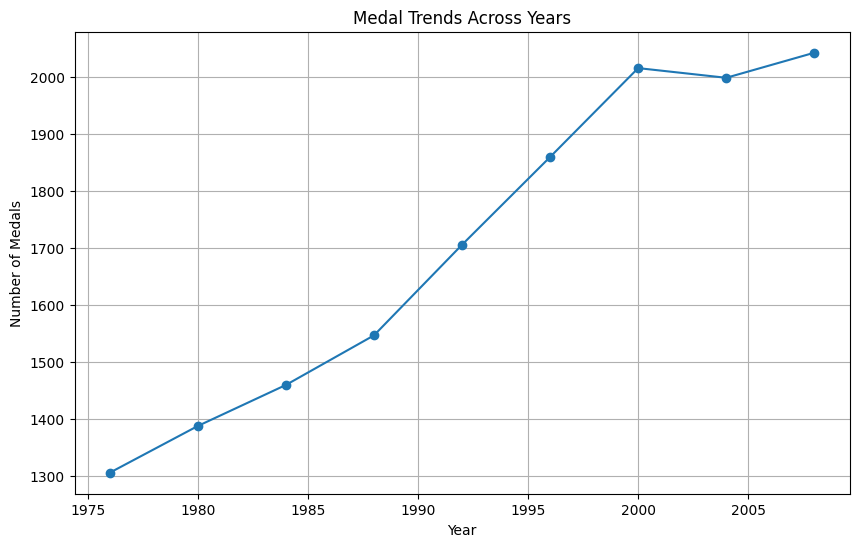

In [50]:
import matplotlib.pyplot as plt

# Plot medal trends across years
plt.figure(figsize=(10,6))
plt.plot(medal_trends.index, medal_trends.values, marker='o')
plt.title('Medal Trends Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()


In [53]:
# Group by 'country' and count the number of medals
top_countries = data.groupby('country')['medal'].count().sort_values(ascending=False)

# Display the top-performing countries
print(top_countries.head())  # Show top 5 countries



country
United States    1992
Soviet Union     1021
Australia         798
Germany           691
China             679
Name: medal, dtype: int64


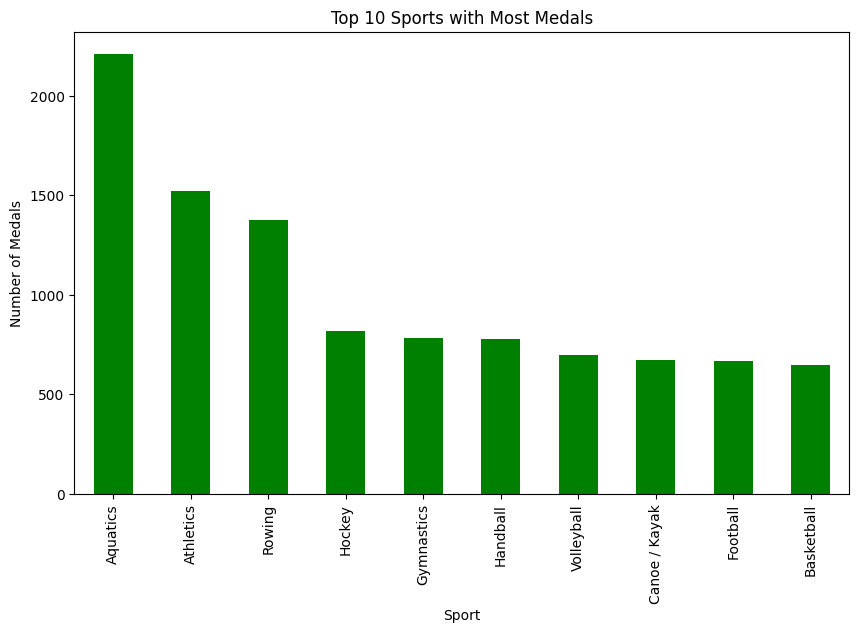

In [61]:
# Group by 'sport' and count the number of medals
sport_medals = data.groupby('sport')['medal'].count().sort_values(ascending=False)

# Plot sport-wise medal distribution
plt.figure(figsize=(10,6))
sport_medals.head(10).plot(kind='bar', color='green')  # Top 10 sports
plt.title('Top 10 Sports with Most Medals')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()


In [73]:
gender_distribution = data['gender'].value_counts()

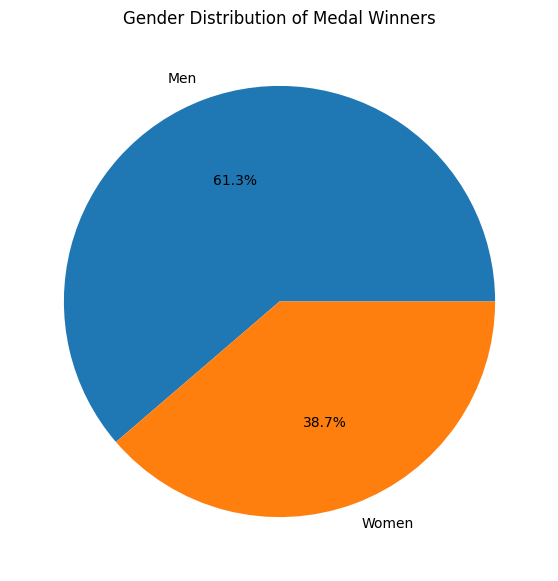

In [74]:
gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.title('Gender Distribution of Medal Winners')
plt.ylabel('')  # Hide the y-axis label for aesthetics
plt.show()
